In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #Per dividere campione in train, validation e test
from sklearn.preprocessing import MinMaxScaler #Per normalizzazione delle features
from torch.utils.data import Dataset, DataLoader #Per costruire dataset e dataloader
import torch

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [2]:
#Lettura del dataset in pandas DataFrame (il file 'dati.csv' è il file prodotto dall'analisi iniziale eseguita sul primo jupyter)
df = pd.read_csv('drive/MyDrive/dati.csv')

# ANALISI E VISUALIZZAZIONE DEL DATASET

In [3]:
display(df)

,jet_pt,jet_eta,flavor,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
0,47.8712,1.893250,5,21.176500,8.365860,29.026900,4.149000e+00,5.0,2.686240e-11,0.059397,0.060374,32.8902,3.0,7.0,0.162448,1.594080,0.862678
1,34.9703,0.609755,5,5.007700,3.035830,2.007540,3.299210e-01,3.0,1.762730e-05,0.066609,0.149812,25.1935,1.0,3.0,0.122343,2.239620,0.930327
2,26.5706,-0.530268,5,0.807884,0.630565,1.044520,1.283360e+00,0.0,4.808580e-02,0.097381,0.113961,-1.0000,-1.0,-1.0,14.333160,-1.000000,0.009878
3,36.9246,-2.074420,5,16.561700,10.357000,17.516600,3.049920e+01,4.0,4.353190e-10,0.162495,0.115695,73.6335,1.0,2.0,0.259107,0.755648,0.594634
4,28.9667,1.512090,5,18.032500,16.144500,3.293590,9.003470e+00,4.0,3.314360e-11,0.088521,0.093888,293.7900,1.0,4.0,0.087132,1.400080,1.000140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,35.1177,0.252782,5,2.112390,1.332850,0.441166,2.177540e-01,2.0,8.125190e-04,0.115231,0.125688,11.3646,1.0,2.0,1.058650,1.409550,0.463417
1999996,34.8303,-0.808358,5,0.824012,0.416280,1.377850,7.606030e-01,0.0,4.774590e-02,0.066126,0.025138,-1.0000,-1.0,-1.0,14.333160,-1.000000,0.009878
1999997,29.4848,-0.840796,5,1.450840,1.252500,0.770663,1.968150e+00,1.0,6.777230e-04,0.050063,0.131098,19.5591,1.0,2.0,0.210880,0.983754,0.579169
1999998,25.7466,-0.865773,5,3.997710,0.000003,1.216380,1.882705e-08,2.0,6.869750e-05,0.044935,0.064068,16.9286,1.0,2.0,0.089523,0.888597,0.955825


Statistica descrittiva:

In [4]:
df.describe()

,jet_pt,jet_eta,flavor,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.999999e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,3.425065e+01,3.020789e-04,4.583443e+00,6.912148e+00,3.774151e+00,5.651296e+00,3.559804e+00,2.409225e+00,1.095089e-02,1.001760e-01,1.084791e-01,7.670327e+01,7.579895e-01,2.902715e+00,4.560261e+00,1.020090e+00,5.710019e-01
std,1.311151e+01,1.357499e+00,1.377570e+00,9.046804e+00,6.029914e+00,2.010096e+01,1.233833e+01,1.757152e+00,6.752780e-02,4.574473e-02,4.907989e-02,1.145444e+02,1.313733e+00,3.774707e+00,6.476640e+00,1.812855e+00,5.191752e-01
min,2.291570e+01,-2.500000e+00,0.000000e+00,5.198300e-07,2.737835e-06,3.994000e-07,1.882705e-08,0.000000e+00,-1.000000e+00,1.637795e-06,9.095850e-07,-1.000000e+00,-1.000000e+00,-1.000000e+00,6.523560e-05,-1.000000e+00,9.878450e-03
25%,2.634060e+01,-1.124530e+00,5.000000e+00,1.295680e+00,4.686540e-01,5.809030e-01,2.797022e-01,1.000000e+00,4.727867e-08,6.767670e-02,7.389788e-02,-1.000000e+00,-1.000000e+00,-1.000000e+00,8.411720e-02,-1.000000e+00,9.878450e-03
50%,3.029800e+01,3.510430e-04,5.000000e+00,3.493425e+00,1.476720e+00,1.498410e+00,1.015475e+00,2.000000e+00,3.204430e-05,9.545435e-02,1.033030e-01,3.984740e+01,1.000000e+00,2.000000e+00,1.668100e-01,8.883290e-01,5.330935e-01
75%,3.738760e+01,1.125230e+00,5.000000e+00,8.994497e+00,4.522482e+00,4.662092e+00,2.737595e+00,4.000000e+00,2.966535e-03,1.274240e-01,1.371700e-01,1.059580e+02,2.000000e+00,5.000000e+00,1.433316e+01,2.004330e+00,9.198622e-01
max,6.967120e+02,2.500000e+00,5.000000e+00,2.390820e+02,2.464090e+02,1.863840e+03,2.195400e+03,1.900000e+01,4.281550e-01,3.997130e-01,3.992560e-01,6.207690e+03,1.200000e+01,5.200000e+01,1.433316e+01,2.405930e+01,4.332170e+00


Correlazione tra le features:

In [5]:
df.corr()

,jet_pt,jet_eta,flavor,track_2_d0_significance,track_3_d0_significance,track_2_z0_significance,track_3_z0_significance,n_tracks_over_d0_threshold,jet_prob,jet_width_eta,jet_width_phi,vertex_significance,n_secondary_vertices,n_secondary_vertex_tracks,delta_r_vertex,vertex_mass,vertex_energy_fraction
jet_pt,1.000000,0.001066,0.069632,0.152196,0.168877,0.032493,0.044955,0.210486,-0.049139,-0.188784,-0.200285,0.094140,0.146420,0.153835,-0.102979,0.162002,0.065612
jet_eta,0.001066,1.000000,0.000084,0.000189,-0.001108,-0.001124,-0.000496,-0.000504,-0.000273,0.000250,-0.000326,-0.000456,-0.000242,-0.000354,0.000350,-0.000214,-0.000774
flavor,0.069632,0.000084,1.000000,0.191263,0.163389,0.058671,0.068616,0.345466,-0.163397,0.012532,-0.008130,0.188234,0.356952,0.285921,-0.397118,0.306701,0.300724
track_2_d0_significance,0.152196,0.000189,0.191263,1.000000,0.758699,0.369210,0.335446,0.579487,-0.115185,-0.044316,0.069044,0.537595,0.371891,0.326408,-0.328466,0.323455,0.295433
track_3_d0_significance,0.168877,-0.001108,0.163389,0.758699,1.000000,0.261239,0.367955,0.622338,-0.096018,-0.044253,0.045835,0.530825,0.408018,0.400064,-0.323213,0.382096,0.333423
track_2_z0_significance,0.032493,-0.001124,0.058671,0.369210,0.261239,1.000000,0.232748,0.181183,-0.037528,0.021185,-0.004591,0.171823,0.065787,0.034394,-0.072661,0.028597,0.028219
track_3_z0_significance,0.044955,-0.000496,0.068616,0.335446,0.367955,0.232748,1.000000,0.226366,-0.039122,0.023098,-0.009951,0.228199,0.122947,0.087667,-0.119209,0.080039,0.075134
n_tracks_over_d0_threshold,0.210486,-0.000504,0.345466,0.579487,0.622338,0.181183,0.226366,1.000000,-0.209757,-0.030269,0.033254,0.500090,0.740535,0.764464,-0.619879,0.726569,0.657396
jet_prob,-0.049139,-0.000273,-0.163397,-0.115185,-0.096018,-0.037528,-0.039122,-0.209757,1.000000,0.078200,0.062162,-0.106153,-0.194184,-0.154557,0.214585,-0.165638,-0.162929
jet_width_eta,-0.188784,0.000250,0.012532,-0.044316,-0.044253,0.021185,0.023098,-0.030269,0.078200,1.000000,0.187885,0.010193,-0.000839,-0.005549,-0.005610,0.034960,-0.015899


Distribuzione del target

(array([0.165466, 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.005784, 1.82875 ]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

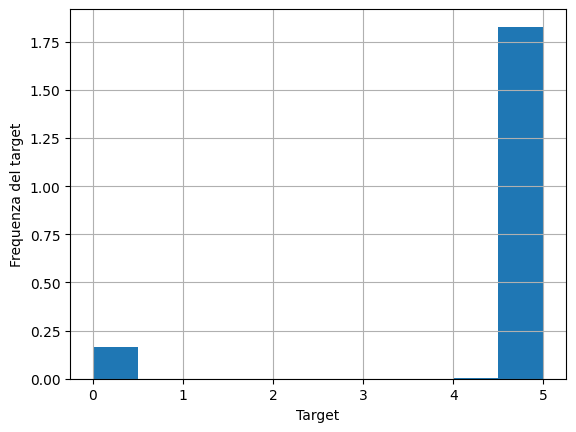

In [9]:
plt.figure()
plt.grid()
plt.xlabel("Target")
plt.ylabel("Frequenza del target")
plt.hist(df['flavor'], density = True)

Si verificherà in seguito se la distribuzione cambi significativamente considerando solo il campione ridotto utilizzato per il training della LSTM

In [10]:
#Nella colonna "track_3_z0_significance" sostituisco i simboli '-' con il valore numerico 0
column_name = 'track_3_z0_significance'
df[column_name] = df[column_name].replace('-', 0)

Colonne del dataframe:

In [11]:
for i in df.columns:
  print(i)

jet_pt
jet_eta
flavor
track_2_d0_significance
track_3_d0_significance
track_2_z0_significance
track_3_z0_significance
n_tracks_over_d0_threshold
jet_prob
jet_width_eta
jet_width_phi
vertex_significance
n_secondary_vertices
n_secondary_vertex_tracks
delta_r_vertex
vertex_mass
vertex_energy_fraction


# PREPROCESSING DEI DATI TRAMITE TORCH

In [12]:
#FEATURES
features = ['jet_pt', 'jet_eta', 'track_2_d0_significance', 'track_3_d0_significance', 'track_2_z0_significance',
       'track_3_z0_significance', 'n_tracks_over_d0_threshold', 'jet_prob',
       'jet_width_eta', 'jet_width_phi', 'vertex_significance',
       'n_secondary_vertices', 'n_secondary_vertex_tracks', 'delta_r_vertex',
       'vertex_mass', 'vertex_energy_fraction']

#TARGET
target = 'flavor'
features, target

(['jet_pt',
  'jet_eta',
  'track_2_d0_significance',
  'track_3_d0_significance',
  'track_2_z0_significance',
  'track_3_z0_significance',
  'n_tracks_over_d0_threshold',
  'jet_prob',
  'jet_width_eta',
  'jet_width_phi',
  'vertex_significance',
  'n_secondary_vertices',
  'n_secondary_vertex_tracks',
  'delta_r_vertex',
  'vertex_mass',
  'vertex_energy_fraction'],
 'flavor')

Divido le 3 classi iniziali (Light, Charm e Bottom) in Signal e Background

In [13]:
#Signal: jets produced from Bottom quarks
#Background: jets produced from light and charm quarks

df[target][df[target] == 5] = 1 #Signal
df[target][df[target] == 0] = 0 #Background (light Q)
df[target][df[target] == 4] = 0 #Background (charm Q)

<ipython-input-13-09efb9dbf552>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target][df[target] == 5] = 1 #Signal
<ipython-input-13-09efb9dbf552>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target][df[target] == 0] = 0 #Background (light Q)
<ipython-input-13-09efb9dbf552>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target][df[target] == 4] = 0 #Background (charm Q)


Verifico ora se la distribuzione del target sia significativamente cambiata

In [14]:
len(df[df.iloc[:, 2] == 1]), len(df[df.iloc[:, 2] == 0])

(1828750, 171250)

In [16]:
#Rapporto tra eventi classe 0 e classe 1
len(df[df.iloc[:, 2] == 0])/len(df[df.iloc[:, 2] == 1])

0.0936431989063568

(array([0.85625, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
        0.     , 0.     , 9.14375]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

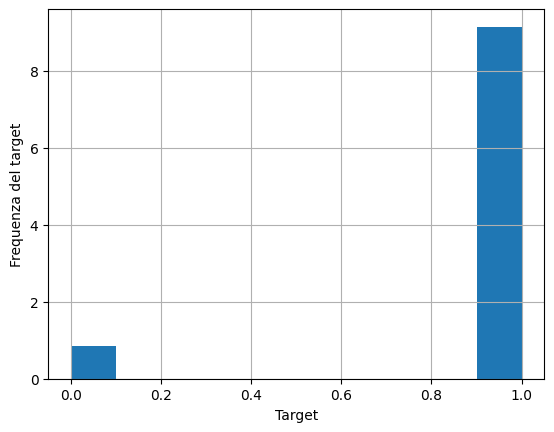

In [17]:
plt.figure()
plt.grid()
plt.xlabel("Target")
plt.ylabel("Frequenza del target")
plt.hist(df[target], density = True)

La ditribuzione del target è fortemente sproporzionata a favore della classe di Signal. Si è verificato che indipendentemente da quanti dati si considerino il rapporto tra numero di eventi appartenenti a classe S con numero di eventi appartenenti a classe B sia sempre di circa:

In [18]:
len(df[df.iloc[:, 2] == 0])/len(df[df.iloc[:, 2] == 1])

0.0936431989063568

Per evitare di mandare in overload la RAM usiamo per la LSTM solo un campione limitato dei dati:

In [19]:
df = df.loc[:99999]
len(df)

100000

Divisione del dataset in Train, Validation e Test set:

In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size = 0.2, shuffle = True)
vali_data, test_data = train_test_split(test_data, test_size = 0.5, shuffle = True)

print(f"Shape of train_data: {train_data.shape}")
print(f"Shape of vali_data: {vali_data.shape}")
print(f"Shape of test_data: {test_data.shape}")

Shape of train_data: (80000, 17)
Shape of vali_data: (10000, 17)
Shape of test_data: (10000, 17)


In [21]:
#Classe che implementa la logica del dataset
class MyDataset(Dataset):
    def __init__(self, data, time_steps = 1):
        self.X = data[features]
        self.y = data[target]
        self.scaler = MinMaxScaler() #Normalizzazione delle features inclusa nella classe che istanzia il dataset
        self.X = self.scaler.fit_transform(self.X)
        self.X = self.X.reshape(-1, time_steps, self.X.shape[1]) #Riorganizzo le dimensioni del vettore di features per renderlo compatibile con modello LSTM
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [22]:
#Istanzio il dataset
train_dataset = MyDataset(train_data)
vali_dataset = MyDataset(vali_data)
test_dataset = MyDataset(test_data)

Dataloaders:

In [23]:
batch_size = 50
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
vali_loader = DataLoader(vali_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# MODELLO LSTM

In [24]:
# controlliamo se la GPU è disponibile e nel caso quale tipo di GPU
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Numero di GPU disponibili:  1
Tesla T4
Computation device: cuda



Di default il modello definito è costituito da un solo layer LSTM (non stack LSTM) e 1 neurone in uscita.

In [25]:
import torch.nn as nn
#LSTM model
class myLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers = 1, output_size = 1):
        super(myLSTM, self).__init__()

        #Strato LSTM
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout1 = nn.Dropout(0.5)

        #MLP
        #Primo strato fully connected
        self.fc1 = nn.Linear(hidden_size, 64)
        self.activ = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)

        #Secondo strato fully connected
        self.fc2 = nn.Linear(64, 32)

        #Terzo strato fully connected
        self.fc3 = nn.Linear(32, 16)

        #Quarto strato fully connected
        self.fc4 = nn.Linear(16, output_size)
        self.sigmoid = nn.Sigmoid() #Funzione di attivazione sigmoide dopo lo strato fully connected per normalizzare output tra 0 e 1


    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout1(out[:, -1, :]) #In uscita alla LSTM applichiamo un dropout per evitare overfitting

        out = self.fc1(out)
        out = self.activ(out)
        out = self.dropout2(out)

        out = self.fc2(out)
        out = self.activ(out)
        out = self.dropout2(out)

        out = self.fc3(out)
        out = self.activ(out)
        out = self.dropout2(out)

        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

In [26]:
# definiamo loss e optimizer
learning_rate = 0.001
num_hidden_units = 64

model = myLSTM(input_size=len(features), hidden_size=num_hidden_units).to(device)
print(model)

# loss function: uso BCE per task di classificazione binaria
loss_func = nn.BCELoss()

# ottimizzatore: Adam
from torch import optim
opt = optim.Adam(model.parameters(), lr = learning_rate)

#install torchmetrics
%pip install torchmetrics
import torchmetrics
from torchmetrics import AUROC
metric_func = AUROC(task = 'binary')

#Sposto metric_func su GPU
metric_func.to(device)

myLSTM(
  (lstm): LSTM(16, 64, batch_first=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (activ): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 14.4 MB/s eta 0:00:00


BinaryAUROC()

In [27]:
# testiamo il modello su un batch
xb, yb = next(iter(train_loader))

xb = xb.to(device)
yb = yb.to(device)

out = model(xb)
print(out.shape)
print(yb.shape)
print(yb[0])
print(out[0])

torch.Size([50, 1])
torch.Size([50])
tensor(1., device='cuda:0')
tensor([0.4137], device='cuda:0', grad_fn=<SelectBackward0>)


In [28]:
#Classe per salvataggio del miglior modello
class SaveBestModel:
    def __init__(self, best_valid_loss=float('inf')): #object initialized with best_loss = +infinite
        self.best_valid_loss = best_valid_loss

    def __call__(
        self, current_valid_loss,
        epoch, model, optimizer, criterion, metric,
    ):
        if current_valid_loss < self.best_valid_loss:
            self.best_valid_loss = current_valid_loss

            print(f"\nBest validation loss: {self.best_valid_loss}")
            print(f"\nSaving best model for epoch: {epoch+1}\n")

            torch.save({'model' : model,
                'epoch': epoch+1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': criterion,
                'metric': metric,
                }, 'best_model.pt')

In [29]:
scheduler = optim.lr_scheduler.StepLR(opt, step_size = 5, gamma=0.1, last_epoch=-1, verbose=True)
save_best_model = SaveBestModel()

# Training loop
import time

# numero di epoche
epochs = 20

# liste su cui salvare il valore della loss ad ogni epoca per poterla graficare in funzione
# dell'epoca a fine addestramento
hist_loss = []
hist_metric = []
hist_vloss = []
hist_vmetric = []

# loop sulle epoche
for epoch in range(epochs):
    t0 = time.time()

    # training step
    model.train()

    train_metric = 0
    train_loss = 0
    counter = 0

    for xb, yb in train_loader:
        counter += 1

        xb = xb.to(device)
        yb = yb.to(device)

        pred = model(xb) #predizione del modello

        # calcolo loss
        loss = loss_func(pred, yb.unsqueeze(1))

        #Calcolo metrica
        metric = metric_func(pred, yb.unsqueeze(1))

        # aggiorno la loss e metrica totale
        train_metric += metric.item()
        train_loss += loss.item()

        # backpropagation
        opt.zero_grad()
        loss.backward()
        opt.step()


    train_loss /= counter
    train_metric /= counter
    hist_loss.append(train_loss)
    hist_metric.append(train_metric)

    # validation step non aggiornando i pesi
    model.eval()
    vali_metric = 0
    vali_loss = 0
    counter = 0
    with torch.no_grad():
      for xb, yb in vali_loader:
        counter += 1

        xb = xb.to(device)
        yb = yb.to(device)

        pred = model(xb) #predizione del modello

        #Calcolo loss e metrica
        vloss = loss_func(pred, yb.unsqueeze(1))
        vmetric = metric_func(pred, yb.unsqueeze(1))
        vali_loss += vloss.item()
        vali_metric += vmetric.item()

    vali_loss /= counter
    vali_metric /= counter
    hist_vloss.append(vali_loss)
    hist_vmetric.append(vali_metric)

    #save best model
    save_best_model(vali_loss, epoch, model, opt, loss_func, metric_func)

    elapsed_time = time.time()-t0
    #Risultati dell'epoca
    print("epoch: %d, time(s): %.4f, train loss: %.6f, train metric: %.6f, vali loss: %.6f, vali metric: %.6f"
          % (epoch+1, elapsed_time, train_loss, train_metric, vali_loss, vali_metric))

    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-03.


/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: No negative samples in targets, false positive value should be meaningless. Returning zero tensor in false positive score
  warnings.warn(*args, **kwargs)



Best validation loss: 0.2172074859868735

Saving best model for epoch: 1

epoch: 1, time(s): 23.9105, train loss: 0.250930, train metric: 0.821464, vali loss: 0.217207, vali metric: 0.878540
Adjusting learning rate of group 0 to 1.0000e-03.

Best validation loss: 0.20860052280128002

Saving best model for epoch: 2

epoch: 2, time(s): 10.8454, train loss: 0.209893, train metric: 0.873512, vali loss: 0.208601, vali metric: 0.892882
Adjusting learning rate of group 0 to 1.0000e-03.

Best validation loss: 0.2055745592713356

Saving best model for epoch: 3

epoch: 3, time(s): 10.4334, train loss: 0.207704, train metric: 0.876335, vali loss: 0.205575, vali metric: 0.887404
Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 4, time(s): 9.3791, train loss: 0.204976, train metric: 0.882768, vali loss: 0.211232, vali metric: 0.886986
Adjusting learning rate of group 0 to 1.0000e-03.
epoch: 5, time(s): 10.1149, train loss: 0.203884, train metric: 0.884369, vali loss: 0.210082, vali metric:

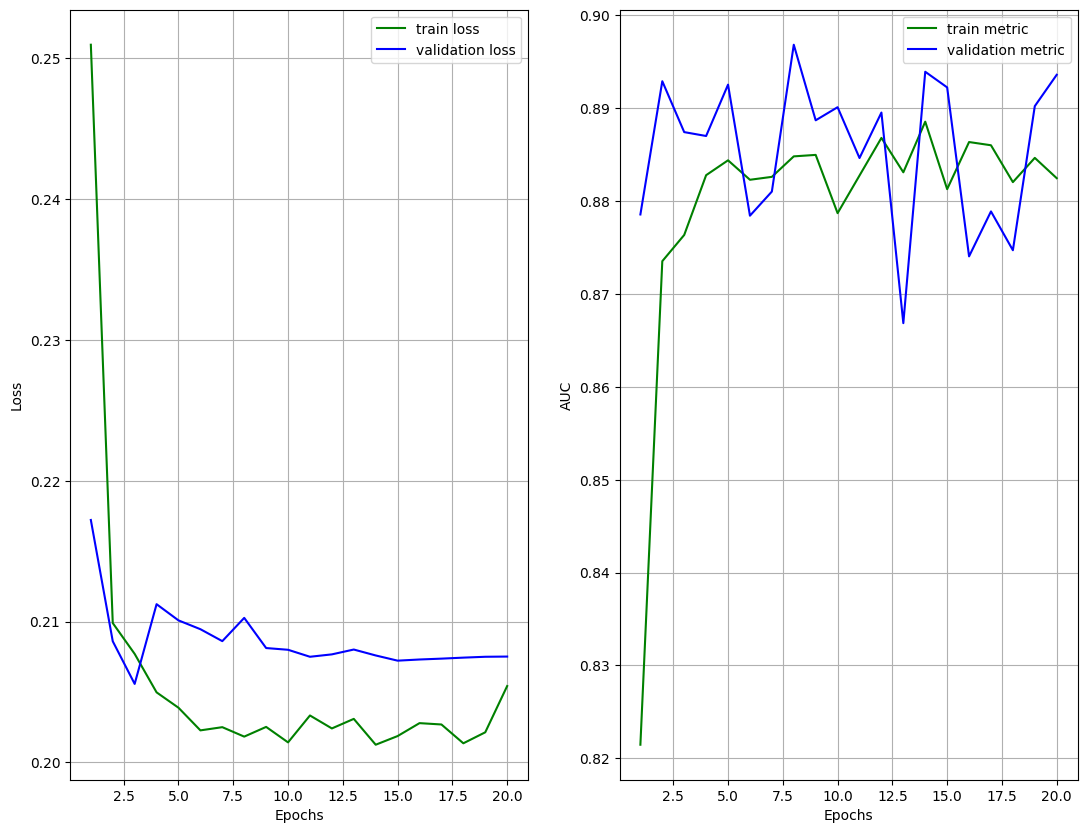

In [30]:
#Grafici per monitorare il training
#Loss
plt.figure(figsize=(13, 10))
plt.subplot(1,2,1)
plt.plot(range(1,len(hist_loss)+1), hist_loss, color='green', linestyle='-', label='train loss')
plt.plot(range(1,len(hist_vloss)+1), hist_vloss, color='blue', linestyle='-', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

#Accuracy
plt.subplot(1,2,2)
plt.plot(range(1,len(hist_metric)+1),hist_metric, color='green', linestyle='-', label='train metric')
plt.plot(range(1,len(hist_vmetric)+1),hist_vmetric, color='blue', linestyle='-', label='validation metric')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.grid()
plt.legend()
plt.show()

# VALUTAZIONE DELLE PRESTAZIONI
Le prestazioni della rete vengono valutate sul test set computando l'AUC della curva ROC.

Spostiamo il modello su cpu per valutare prestazioni sul test set:

In [31]:
device = 'cpu'
model.to(device)

myLSTM(
  (lstm): LSTM(16, 64, batch_first=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (activ): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

AUC e grafico della curva ROC:

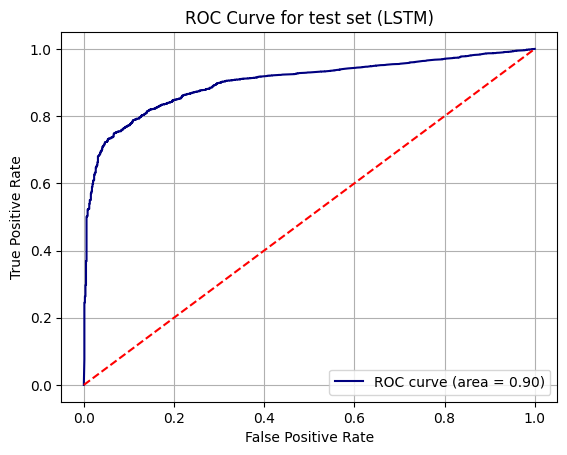

In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have a test data loader named test_loader
def test(model, test_loader):
    model.eval()
    y_true = []
    y_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predicted_probs = outputs.squeeze().tolist()

            y_true.extend(labels.tolist())
            y_scores.extend(predicted_probs)

    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)

    return fpr, tpr, auc

test_fpr, test_tpr, test_auc = test(model, test_loader)

# Plot the ROC curve
plt.plot(test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc, color = 'navy')
plt.plot([0, 1], [0, 1], 'r--')  #Linea diagonale (classificatore casuale)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set (LSTM)')
plt.legend(loc='lower right')
plt.grid()
plt.show()